In [2]:
from OpenSSL import crypto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import time

In [3]:
def normalise_counter(ctr):
    total = sum(ctr.values())
    for key in ctr.keys():
        ctr[key] /=total
    return ctr

In [4]:
phish_df = pd.read_csv('final_certificate_datasets/phish_dataset.csv')
benign_df = pd.read_csv('final_certificate_datasets/benign_certs.csv')
benign_df.drop_duplicates(subset=['CN'],inplace=True)
phish_df2 = pd.read_csv('final_certificate_datasets/phish_harsh_subset.csv')
phish_df3 =  pd.read_csv('final_certificate_datasets/phish_dataset_urls.csv')
benign_df2 = pd.read_csv('final_certificate_datasets/benign_unpopular.csv')
benign_df2.drop_duplicates(subset=['CN'],inplace=True)
benign_df2['verCode'] = benign_df2['verCode'].astype(str)
#benign_df3 = benign_df[:500]
all_dfs = [phish_df,phish_df2,phish_df3,benign_df,benign_df2]
labels = ['phish','phish subset','phish all urls','benign','benign unpopular']

In [5]:
def experiment(df,valid_only=True):

    if valid_only:
        df = df.loc[df['verCode'].astype(str)=='0']
        
    total = len(df)
    Os = df['O']
    business = df['businessCategory']
    
    OV_count = 0
    EV_count = 0
    DV_count = 0
    hasnt_O = list(Os.isna())
    for i,e in enumerate(list(business.isna())):
        if not e:
            EV_count+=1
        else:
            if not hasnt_O[i]:
                OV_count +=1
            else:
                DV_count +=1
    print("DV: {} | OV: {} | EV: {}".format(DV_count,OV_count,EV_count))
    print("DV: {} | OV: {} | EV: {}".format(DV_count/total,OV_count/total,EV_count/total))
    return DV_count/total,OV_count/total,EV_count/total,DV_count,OV_count,EV_count

In [6]:
dvs,ovs,evs = [],[],[]
dvs2,ovs2,evs2 = [],[],[]
for z,df in enumerate(all_dfs):
    print(labels[z])
    a,b,c,d,e,f = experiment(df)
    dvs.append(a)
    ovs.append(b)
    evs.append(c)
    dvs2.append(d)
    ovs2.append(e)
    evs2.append(f)

phish
DV: 4342 | OV: 169 | EV: 14
DV: 0.9595580110497237 | OV: 0.037348066298342544 | EV: 0.0030939226519337017
phish subset
DV: 1507 | OV: 10 | EV: 2
DV: 0.9921000658327848 | OV: 0.0065832784726793945 | EV: 0.0013166556945358788
phish all urls
DV: 8517 | OV: 4066 | EV: 168
DV: 0.6679476119520038 | OV: 0.3188769508273861 | EV: 0.013175437220610148
benign
DV: 18162 | OV: 7764 | EV: 1096
DV: 0.6721190141366294 | OV: 0.2873214417881726 | EV: 0.04055954407519799
benign unpopular
DV: 8454 | OV: 814 | EV: 149
DV: 0.8977381331634279 | OV: 0.08643941807369651 | EV: 0.01582244876287565


In [7]:
bardf = pd.DataFrame()
bardf['DV'] = dvs
bardf['OV'] = ovs
bardf['EV'] = evs
bardf['datasets'] = labels
bardf.set_index('datasets',inplace=True)

<AxesSubplot:ylabel='datasets'>

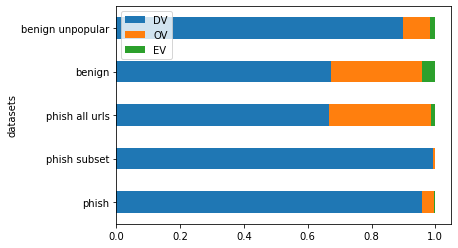

In [8]:
bardf.plot(y=['DV','OV','EV'],kind='barh',stacked=True)

In [9]:
bardf = pd.DataFrame()
bardf['DV'] = dvs2
bardf['OV'] = ovs2
bardf['EV'] = evs2
bardf['datasets'] = labels
bardf.set_index('datasets',inplace=True)
bardf

,DV,OV,EV
datasets,,,
phish,4342,169,14
phish subset,1507,10,2
phish all urls,8517,4066,168
benign,18162,7764,1096
benign unpopular,8454,814,149


In [15]:
phish_df2.loc[phish_df2['businessCategory'].notna()]['CN']

223    www.paypal-opladen.be
381       www.puntaarenas.cl
Name: CN, dtype: object

In [19]:
zz = phish_df2.loc[phish_df2['O'].notna()]
zz.loc[zz['verCode'].astype(str)=='0']

,Unnamed: 0,Unnamed: 0.1,CN,O,C,businessCategory,serialNumber,juristiction,issuer_CN,issuer_O,expired,notBefore,notAfter,verCode,time_collected
126,509,1289,*.sogou.com,"Beijing Sogou Technology Development Co., Ltd.",CN,NaN,NaN,NaN,GlobalSign RSA OV SSL CA 2018,GlobalSign nv-sa,0.0,b'20200428033050Z',b'20210722052741Z',0,1.620480e+09
127,522,1326,*.oblaci.rs,Preduzece za telekomunikacije Telekom Srbija a...,RS,NaN,NaN,NaN,GlobalSign RSA OV SSL CA 2018,GlobalSign nv-sa,0.0,b'20200109124109Z',b'20220217160641Z',0,1.620480e+09
223,834,2277,www.paypal-opladen.be,PayPal Pte Ltd,SG,Private Organization,200509725E,NaN,DigiCert SHA2 Extended Validation Server CA,DigiCert Inc,0.0,b'20210325000000Z',b'20220425235959Z',0,1.620480e+09
256,936,2671,*.controlpanel.pro,Register S.p.A.,IT,NaN,NaN,NaN,Thawte RSA CA 2018,DigiCert Inc,0.0,b'20190910000000Z',b'20211108120000Z',0,1.620480e+09
259,942,2711,*.airnavindonesia.co.id,Perum LPPNPI,ID,NaN,NaN,NaN,DigiCert SHA2 Secure Server CA,DigiCert Inc,0.0,b'20190826000000Z',b'20210901120000Z',0,1.620480e+09
370,1363,580,*.wl.co,"Facebook, Inc.",US,NaN,NaN,NaN,DigiCert SHA2 High Assurance Server CA,DigiCert Inc,0.0,b'20210317000000Z',b'20210615235959Z',0,1.620480e+09
381,1412,684,www.puntaarenas.cl,I. Municipalidad de Punta Arenas,CL,Private Organization,692502000,NaN,GlobalSign Extended Validation CA - SHA256 - G3,GlobalSign nv-sa,0.0,b'20190422141108Z',b'20210718151102Z',0,1.620480e+09
427,1555,1017,www.mouadarrivalco.org,"Cloudflare, Inc.",US,NaN,NaN,NaN,Cloudflare Inc ECC CA-3,"Cloudflare, Inc.",0.0,b'20201217000000Z',b'20211216235959Z',0,1.620480e+09
451,1637,1233,*.datlas.it,DATLAS S.R.L.,IT,NaN,NaN,NaN,DigiCert TLS RSA SHA256 2020 CA1,DigiCert Inc,0.0,b'20210315000000Z',b'20220411235959Z',0,1.620480e+09
482,1740,1473,sl.al,"Cloudflare, Inc.",US,NaN,NaN,NaN,Cloudflare Inc ECC CA-3,"Cloudflare, Inc.",0.0,b'20210403000000Z',b'20220402235959Z',0,1.620480e+09


In [14]:
phish_df.loc[phish_df['businessCategory'].notna()]

,Unnamed: 0,CN,O,C,businessCategory,serialNumber,juristiction,issuer_CN,issuer_O,expired,notBefore,notAfter,verCode,time_collected
19,30,www.physicianbillers.com,"Physician Billing Associates, Inc.",US,Private Organization,800684408,NaN,Sectigo RSA Extended Validation Secure Server CA,Sectigo Limited,0.0,b'20210122000000Z',b'20220122235959Z',0,1.620480e+09
743,1981,quasit.net,Quasit Systems SRL,RO,Private Organization,26302266,NaN,Sectigo RSA Extended Validation Secure Server CA,Sectigo Limited,1.0,b'20190130000000Z',b'20200130235959Z',10,1.620480e+09
746,1987,snov.io,Snovio Inc,US,Private Organization,6896854,NaN,Sectigo RSA Extended Validation Secure Server CA,Sectigo Limited,0.0,b'20190822000000Z',b'20210916235959Z',0,1.620480e+09
810,2193,mein.advanzia.com,Advanzia Bank S.A.,LU,Private Organization,B109476,NaN,GlobalSign Extended Validation CA - SHA256 - G3,GlobalSign nv-sa,0.0,b'20201103095102Z',b'20211205095102Z',0,1.620480e+09
834,2277,www.paypal-opladen.be,PayPal Pte Ltd,SG,Private Organization,200509725E,NaN,DigiCert SHA2 Extended Validation Server CA,DigiCert Inc,0.0,b'20210325000000Z',b'20220425235959Z',0,1.620480e+09
848,2332,bit.ly,"Bitly, Inc.",US,Private Organization,4627013,NaN,DigiCert SHA2 Extended Validation Server CA,DigiCert Inc,0.0,b'20200805000000Z',b'20210810120000Z',0,1.620480e+09
1278,382,app.adjust.com,Adjust GmbH,DE,Private Organization,HRB 140616,Berlin,DigiCert SHA2 Extended Validation Server CA,DigiCert Inc,0.0,b'20200115000000Z',b'20220419000000Z',0,1.620480e+09
1379,613,www.paypal.com,"PayPal, Inc.",US,Private Organization,3014267,NaN,DigiCert SHA2 Extended Validation Server CA,DigiCert Inc,0.0,b'20201229000000Z',b'20211011235959Z',0,1.620480e+09
1412,684,www.puntaarenas.cl,I. Municipalidad de Punta Arenas,CL,Private Organization,692502000,NaN,GlobalSign Extended Validation CA - SHA256 - G3,GlobalSign nv-sa,0.0,b'20190422141108Z',b'20210718151102Z',0,1.620480e+09
1480,853,owa.gre.ac.uk,University of Greenwich,GB,Private Organization,00986729,NaN,QuoVadis Europe EV SSL CA G1,QuoVadis Trustlink B.V.,0.0,b'20201103123120Z',b'20211103124100Z',0,1.620480e+09
